# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Carregando a base de dados
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
gorjetas = pd.read_csv(url)

In [3]:
# Criando variáveis necessárias
gorjetas['intercept'] = 1  # Adiciona uma constante para a regressão
X = gorjetas[['total_bill', 'intercept']]
y = gorjetas['tip']

# Regressão linear
modelo = sm.OLS(y, X).fit()

# Resultados da regressão
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           6.69e-34
Time:                        19:50:25   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.1050      0.007     14.260      0.0

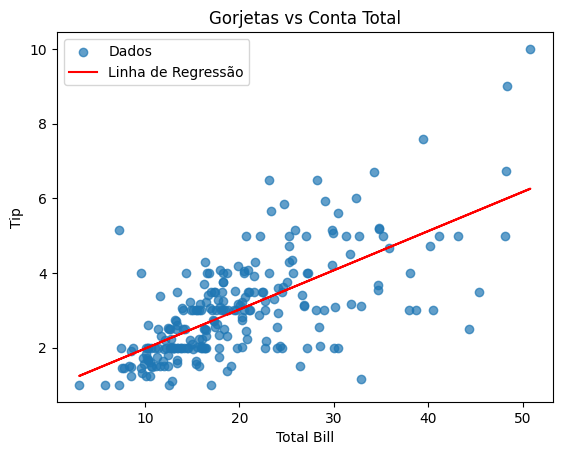

In [4]:
# Gráfico de dispersão
plt.scatter(gorjetas['total_bill'], gorjetas['tip'], alpha=0.7, label='Dados')
plt.plot(gorjetas['total_bill'], modelo.predict(X), color='red', label='Linha de Regressão')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Gorjetas vs Conta Total')
plt.legend()
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [5]:
# Criando as variáveis necessárias
gorjetas['tip_pct'] = gorjetas['tip'] / gorjetas['total_bill']  # Porcentagem da gorjeta
gorjetas['net_bill'] = gorjetas['total_bill'] - gorjetas['tip']  # Conta líquida
gorjetas['intercept'] = 1  # Adicionando uma constante para a regressão

# Regressão de tip_pct por net_bill
X = gorjetas[['net_bill', 'intercept']]
y = gorjetas['tip_pct']
modelo = sm.OLS(y, X).fit()

# Resultados da regressão
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           1.21e-12
Time:                        20:13:39   Log-Likelihood:                 361.93
No. Observations:                 244   AIC:                            -719.9
Df Residuals:                     242   BIC:                            -712.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
net_bill      -0.0033      0.000     -7.500      0.0

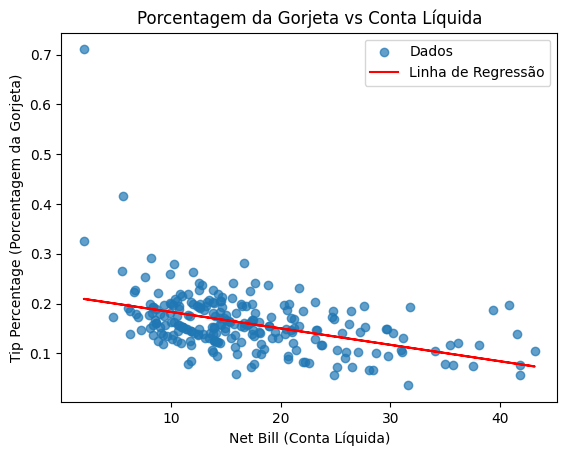

In [6]:
# Gráfico de dispersão
plt.scatter(gorjetas['net_bill'], gorjetas['tip_pct'], alpha=0.7, label='Dados')
plt.plot(gorjetas['net_bill'], modelo.predict(X), color='red', label='Linha de Regressão')
plt.xlabel('Net Bill (Conta Líquida)')
plt.ylabel('Tip Percentage (Porcentagem da Gorjeta)')
plt.title('Porcentagem da Gorjeta vs Conta Líquida')
plt.legend()
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

**Comparação entre os gráficos:**

**Gráfico 1** (Tip vs Total Bill): A relação é linear crescente, pois gorjetas maiores geralmente estão associadas a contas maiores.
O ajuste da regressão é mais direto, com um bom alinhamento aos dados.

**Gráfico 2** (Tip Percentage vs Net Bill): A relação é menos linear. A porcentagem da gorjeta tende a variar mais, especialmente para contas menores.
O ajuste é menos preciso, pois a variabilidade dos dados não é capturada tão bem.

**Comparação do R²:**
Não podemos comparar diretamente os R² dos dois modelos porque eles medem o ajuste em contextos diferentes:
O primeiro modelo avalia o ajuste de valores absolutos da gorjeta.
O segundo modelo avalia o ajuste de proporções (percentuais), que possuem uma escala e variabilidade diferentes.

**Conclusão:**
O R² deve ser interpretado dentro do contexto de cada modelo, e não usado para comparações diretas entre modelos com variáveis dependentes distintas.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [7]:
# Passo 1: Obtenção de valores preditos para tip_pct
gorjetas['pred_tip_pct'] = modelo.fittedvalues

# Passo 2: Cálculo do valor predito para tip
gorjetas['pred_tip'] = gorjetas['pred_tip_pct'] * gorjetas['net_bill']

# Passo 3: Cálculo do R² para o modelo predito de tip
y_real = gorjetas['tip']
y_pred = gorjetas['pred_tip']
ss_res = ((y_real - y_pred) ** 2).sum()  # Soma dos resíduos ao quadrado
ss_tot = ((y_real - y_real.mean()) ** 2).sum()  # Soma total ao quadrado
r2_tip = 1 - (ss_res / ss_tot)

# R² do modelo inicial (item 1)
r2_modelo1 = modelo.rsquared

# Passo 4: Comparação
print(f"R² do modelo ajustado para tip (item 4): {r2_tip:.4f}")
print(f"R² do modelo inicial (item 1): {r2_modelo1:.4f}")


R² do modelo ajustado para tip (item 4): 0.1509
R² do modelo inicial (item 1): 0.1886
